# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

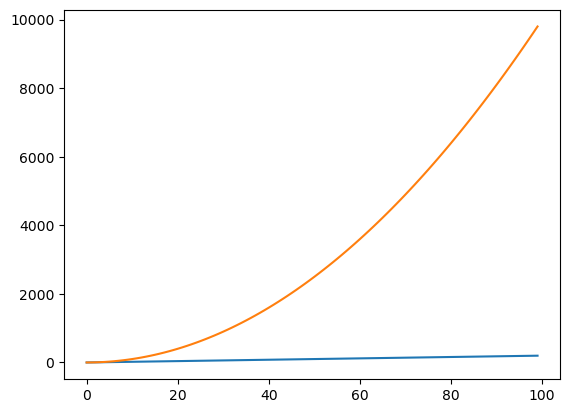

In [5]:
# Method 1
plt.plot(x,y)
plt.plot(x,z)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

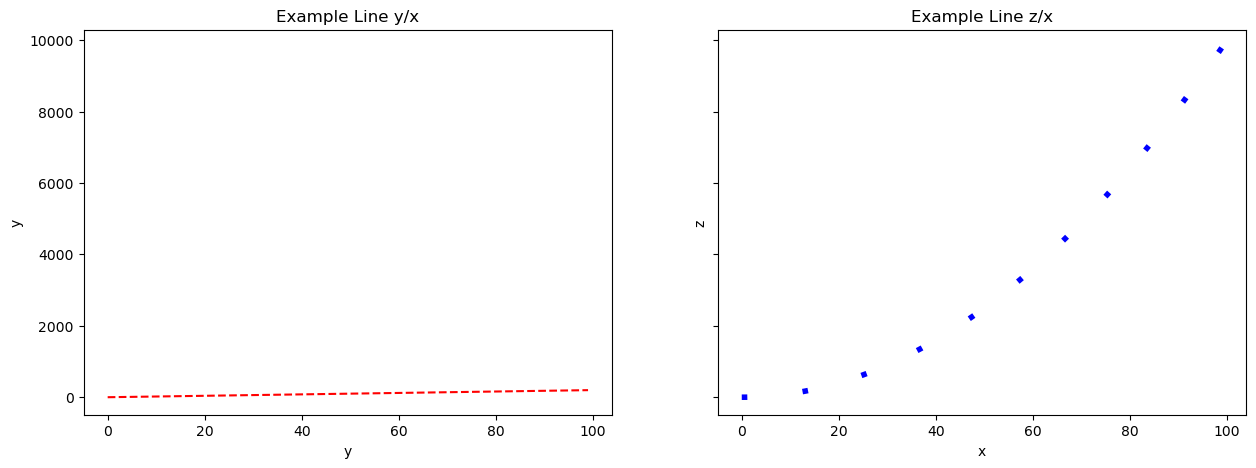

In [16]:
# Method 2
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,5))
#changing to 2 rows, one column will stack the plots one on top of the other 
# vs. side by side. 
ax1.set_title("Example Line y/x")
ax1.set_xlabel("y")
ax1.set_ylabel("y")
ax1.plot(x,y, ls="--", color="red")

ax2.set(title="Example Line z/x", xlabel="x", ylabel="z")
ax2.plot(x,z, ls=(0, (1,10)), color="blue", linewidth='4')
# line styles : solid, dotted, dashed, dashdot, (0, (1,10)) (points)
# detail here https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html 
# default linewidth is 1

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

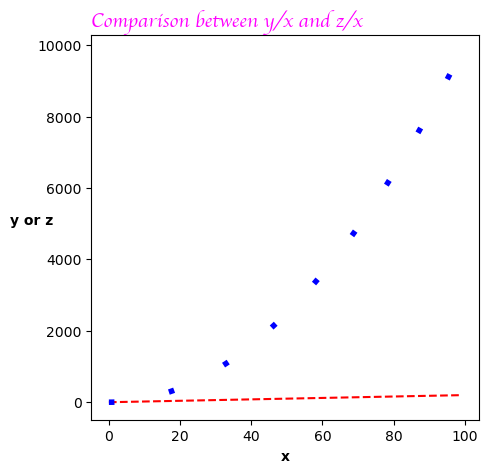

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(5,5))
ax.set_title("Comparison between y/x and z/x", loc='left', color="fuchsia", fontfamily='cursive', fontsize='x-large')
ax.set_xlabel("x", fontweight='bold')
ax.set_ylabel("y or z", fontweight='bold', rotation='horizontal') # yeah two figures would be better than one
plt.plot(x,y, ls="--", color="red")
plt.plot(x,z, ls=(0, (1,10)), color="blue", linewidth='4')
plt.show()

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

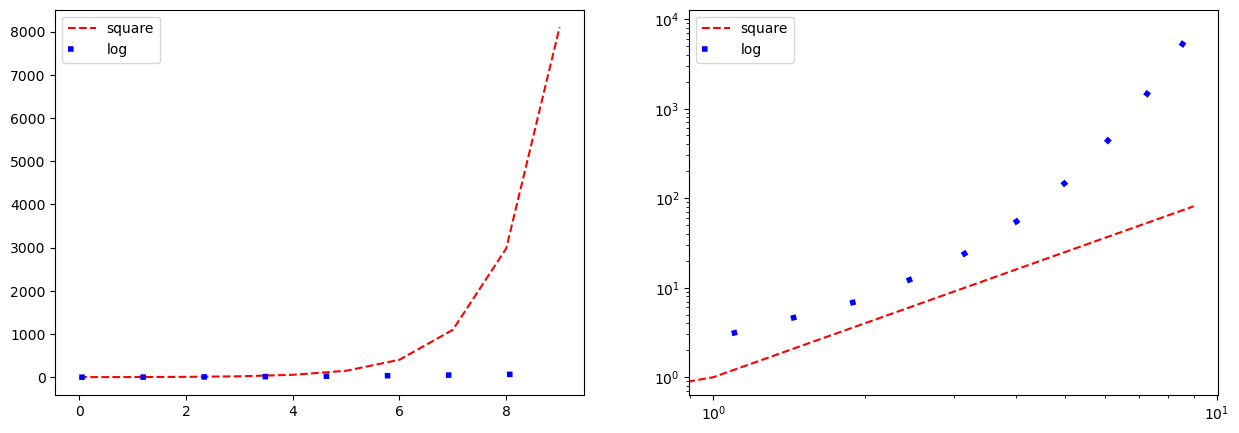

In [181]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15,5))

# ax.set_title("Comparing square and log scales")
x = np.arange(0,10)
z=x**2
q=np.exp(x)

ax1.plot(x, q, ls="--", color="red", label="square")
ax1.plot(x, z, ls=(0, (1,10)), color="blue", linewidth='4', label="log")
ax1.legend(loc='upper left')

ax2.set(xscale='log', yscale='log')
ax2.plot(x, z, ls="--", color="red", label="square")
ax2.plot(x, q, ls=(0, (1,10)), color="blue", linewidth='4', label="log")
ax2.legend(loc='upper left')

plt.show()

#### As a bonus challenge, try to add a legend to the plot.

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [3]:
fitbit= pd.read_csv("Fitbit2.csv")
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


In [203]:
a = pd.DataFrame(fitbit.groupby('Months_encoded', as_index=False)['Steps'].median())
b= list(a.iloc[:,0])
c= list(a.iloc[:,1])
a

,Months_encoded,Steps
0,1,10366.0
1,2,9235.0
2,3,11122.0
3,4,13846.5
4,5,11998.0
5,6,12935.5
6,7,10644.0
7,8,12213.0
8,9,9343.0
9,10,7865.0


In [190]:
d = pd.DataFrame(fitbit.groupby('Work_or_Weekend', as_index=False)['Steps'].median())
e= list(d.iloc[:,0])
f= list(d.iloc[:,1])
d

,Work_or_Weekend,Steps
0,0,9998.0
1,1,10445.5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

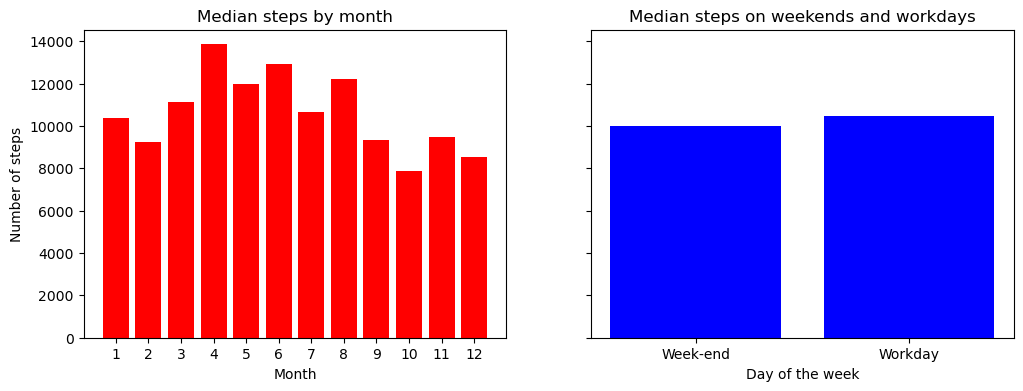

In [237]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12,4))

ax1.set_title("Median steps by month")
ax1.set_xlabel("Month")
ax1.set_xticks(a.Months_encoded)
ax1.set_ylabel("Number of steps")
ax1.bar(list(a.iloc[:,0]),list(a.iloc[:,1]), ls="--", color="red")


ax2.set_title("Median steps on weekends and workdays")
ax2.set_xlabel("Day of the week")
ax2.set_xticks(d.index)
ax2.set_xticklabels(['Week-end', 'Workday'])
ax2.bar(list(d.iloc[:,0]),list(d.iloc[:,1]), ls=(0, (1,10)), color="blue")


plt.show()
fig.savefig('steps_per_month_and_days.jpg')

### to manage subplots
```
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot([1, 2, 3], [0, 0.5, 0.2])

plt.subplot(1, 2, 2)
plt.plot([3, 2, 1], [0, 0.5, 0.2])

plt.suptitle('Implicit Interface: re-call subplot')

for i in range(1, 3):
    plt.subplot(1, 2, i)
    plt.xlabel('Boo')
```
### For xticks and labels 
```
 ax = df.plot()
 ax.set_xticks(df.index)
 ax.set_xticklabels(df.C, rotation=90)
```

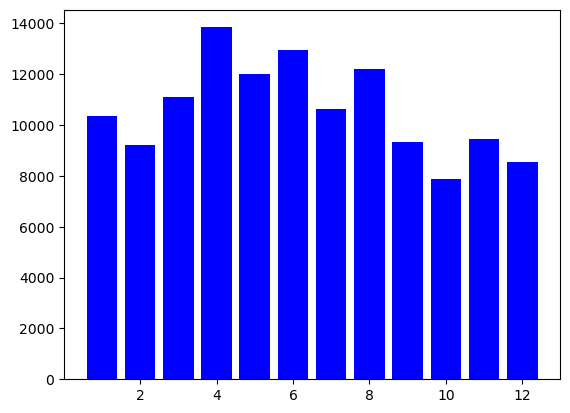

In [152]:
# MEDIAN STEPS BY MONTH_ENCODED
x= [i for i in b]
y= [j for j in c]
plt.bar(x,y, ls="--", color="blue") 
plt.show()

<BarContainer object of 2 artists>

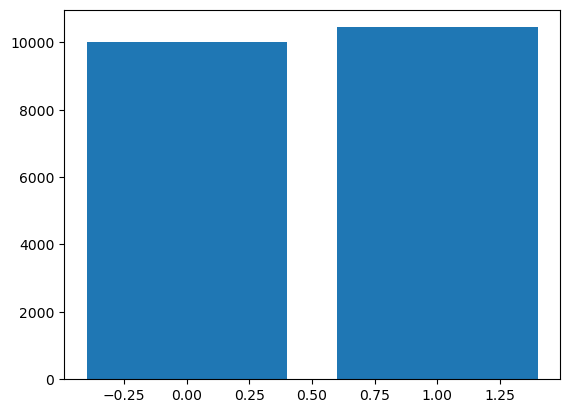

In [155]:
# MEDIAN STEPS BY WORK_OR_WEEKEND
x=[k for k in e]
y= [l for l in f]
plt.bar(x, y)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [207]:
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


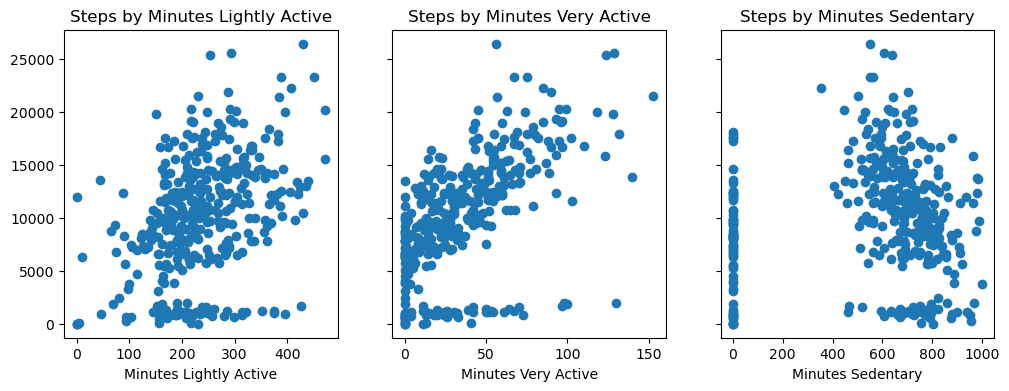

In [8]:
colnames= ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

fig, axs = plt.subplots(1, len(colnames), sharey=True, figsize=(12,4))

i=1
while i <= len(colnames):
    for col in colnames:
        plt.subplot(1, len(colnames), i)
        plt.scatter(fitbit[col],fitbit['Steps'])
        plt.xlabel(col)
        plt.title(f'Steps by {col}')
        i+=1

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [ ]:
# your code here

#### Explore the titanic dataset using Pandas dtypes.

In [ ]:
# your code here

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [ ]:
# NUMERICAL VARIABLES
# your code here

In [ ]:
# CATEGORICAL VARIABLES
# your code here

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [ ]:
# your code here

#### Use the right visulalization to show the distribution of column `Age`.

In [ ]:
# your code here

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

In [ ]:
# your code here

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here
"""

#### Use seaborn to show the distribution of column `Age`.

In [ ]:
# your code here

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Use the right plot to visualize the column `Pclass`.

In [ ]:
# your code here

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here